# TASK 5:- TRAFFIC ACCIDENT DATA ANALYSIS

The task here is to analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

The dataset used here is Road Accidents Dataset from Kaggle.

https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
%matplotlib inline

In [3]:
data=pd.read_csv('data5.csv')

In [5]:
data.head(5)

ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          False        False          Night   
1   False  False           False          False        False          Night   
2   False  False           False           True        False          Night   
3   False  False           False          False        False          Night   
4   False  False           False           True        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                   Day  
2          Night               Day                   Day  
3            Day               Day                   Day  
4            Day               Day                   Day  

[5 rows x 46 columns]

In [8]:
data=data[(data['Start_Time']>= '2022-01-01') & (data['Start_Time']<='2023-12-31') ]
data.reset_index(drop=True,inplace=True)

<Axes: >

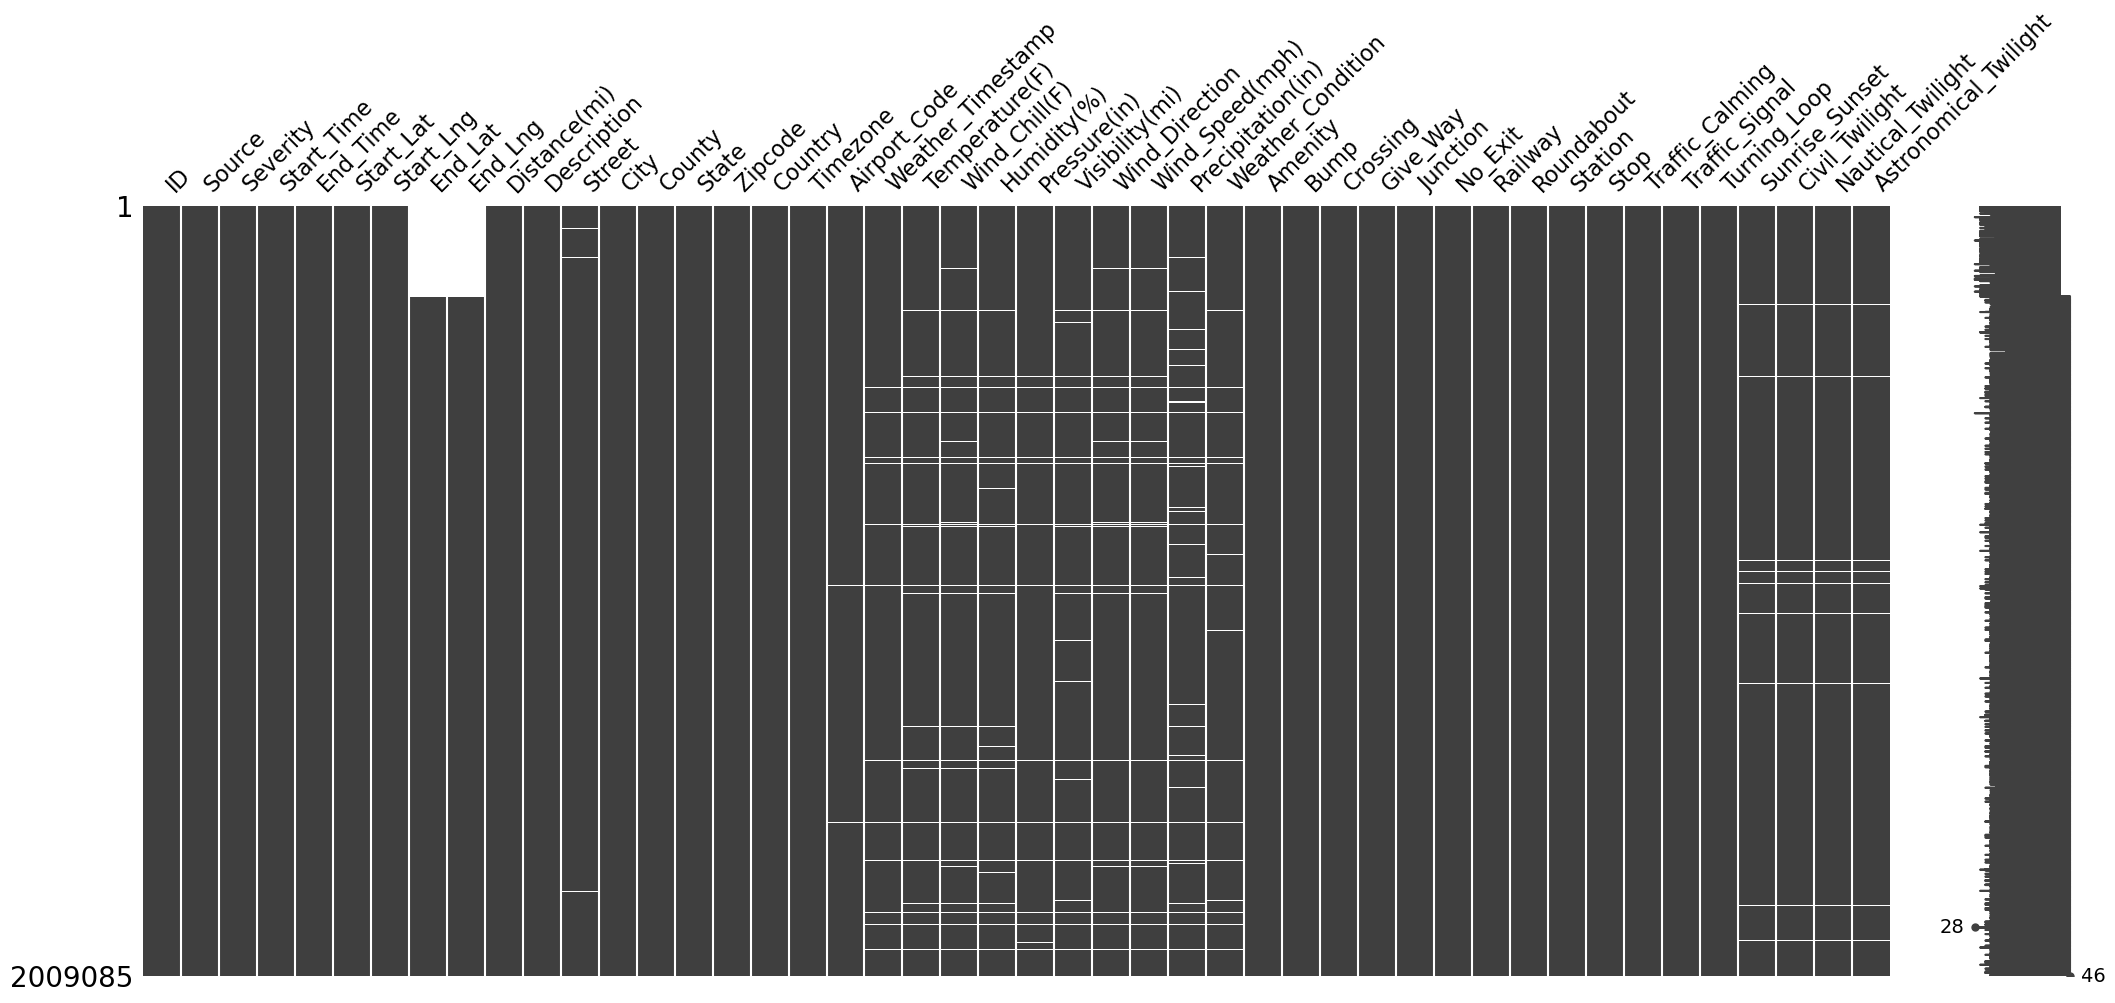

In [9]:
import missingno as msno
msno.matrix(data)

In [12]:
data.dropna(inplace=True)

In [13]:
data.head(5)

ID   Source  Severity                     Start_Time  \
236182  A-3650461  Source1         2  2023-03-31 17:09:16.000000000   
236183  A-3650462  Source1         2  2023-02-27 20:55:00.000000000   
236184  A-3650463  Source1         2  2023-02-26 09:31:45.000000000   
236185  A-3650464  Source1         2  2023-03-21 17:46:42.000000000   
236186  A-3650465  Source1         2  2023-03-24 04:46:30.000000000   

                             End_Time  Start_Lat   Start_Lng    End_Lat  \
236182  2023-03-31 18:09:49.000000000  45.676472  -94.174568  45.666976   
236183  2023-02-27 23:36:34.000000000  41.391812  -75.467365  41.398370   
236184  2023-02-26 11:58:19.000000000  40.850278  -73.946140  40.846945   
236185  2023-03-21 18:31:50.000000000  33.714992  -84.300188  33.714532   
236186  2023-03-24 09:22:00.000000000  33.927671 -118.266385  33.929608   

           End_Lng  Distance(mi)  ... Roundabout Station   Stop  \
236182  -94.176184         0.661  ...      False   False  False   
236183  -75.484203         0.983  ...      False   False  False   
236184  -73.933651         0.692  ...      False   False  False   
236185  -84.266758         1.922  ...      False   False  False   
236186 -118.343065         4.398  ...      False   False  False   

       Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
236182           False          False        False            Day   
236183           False          False        False          Night   
236184           False          False        False            Day   
236185           False          False        False            Day   
236186           False          False        False          Night   

       Civil_Twilight Nautical_Twilight Astronomical_Twilight  
236182            Day               Day                   Day  
236183          Night             Night                 Night  
236184            Day               Day                   Day  
236185            Day               Day                   Day  
236186          Night             Night                 Night  

[5 rows x 46 columns]

In [16]:
data.drop(['ID','Source','Start_Time','End_Time'],axis=1,inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1650164 entries, 236182 to 2009084
Data columns (total 42 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Severity               1650164 non-null  int64  
 1   Start_Lat              1650164 non-null  float64
 2   Start_Lng              1650164 non-null  float64
 3   End_Lat                1650164 non-null  float64
 4   End_Lng                1650164 non-null  float64
 5   Distance(mi)           1650164 non-null  float64
 6   Description            1650164 non-null  object 
 7   Street                 1650164 non-null  object 
 8   City                   1650164 non-null  object 
 9   County                 1650164 non-null  object 
 10  State                  1650164 non-null  object 
 11  Zipcode                1650164 non-null  object 
 12  Country                1650164 non-null  object 
 13  Timezone               1650164 non-null  object 
 14  Airport_Code      

In [20]:
data.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  1.650164e+06  1.650164e+06  1.650164e+06  1.650164e+06  1.650164e+06   
mean   2.052231e+00  3.603648e+01 -9.368344e+01  3.603673e+01 -9.368309e+01   
std    3.189582e-01  5.254670e+00  1.761062e+01  5.255033e+00  1.761024e+01   
min    2.000000e+00  2.457009e+01 -1.245410e+02  2.456998e+01 -1.245445e+02   
25%    2.000000e+00  3.310632e+01 -1.171352e+02  3.311431e+01 -1.171326e+02   
50%    2.000000e+00  3.607719e+01 -8.509996e+01  3.607700e+01 -8.509994e+01   
75%    2.000000e+00  4.007883e+01 -8.009816e+01  4.007812e+01 -8.009598e+01   
max    4.000000e+00  4.900050e+01 -6.903666e+01  4.900222e+01 -6.908818e+01   

       Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  1.650164e+06    1.650164e+06   1.650164e+06  1.650164e+06   
mean   9.996936e-01    6.120065e+01   5.974254e+01  6.258686e+01   
std    2.030221e+00    2.003638e+01   2.256811e+01  2.296492e+01   
min    0.000000e+00   -4.500000e+01  -6.300000e+01  1.000000e+00   
25%    9.900000e-02    4.800000e+01   4.600000e+01  4.600000e+01   
50%    3.490000e-01    6.400000e+01   6.400000e+01  6.400000e+01   
75%    1.049000e+00    7.700000e+01   7.700000e+01  8.200000e+01   
max    1.315880e+02    1.720000e+02   1.720000e+02  1.000000e+02   

       Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  
count  1.650164e+06    1.650164e+06     1.650164e+06       1.650164e+06  
mean   2.935550e+01    9.061582e+00     7.768249e+00       5.716995e-03  
std    1.156553e+00    2.506679e+00     5.590084e+00       4.200127e-02  
min    0.000000e+00    0.000000e+00     0.000000e+00       0.000000e+00  
25%    2.919000e+01    1.000000e+01     5.000000e+00       0.000000e+00  
50%    2.972000e+01    1.000000e+01     7.000000e+00       0.000000e+00  
75%    2.997000e+01    1.000000e+01     1.200000e+01       0.000000e+00  
max    5.863000e+01    9.000000e+01     1.900000e+02       3.000000e+00

# EDA

In [23]:
data1 =data.groupby('State')['Severity'].mean().reset_index()

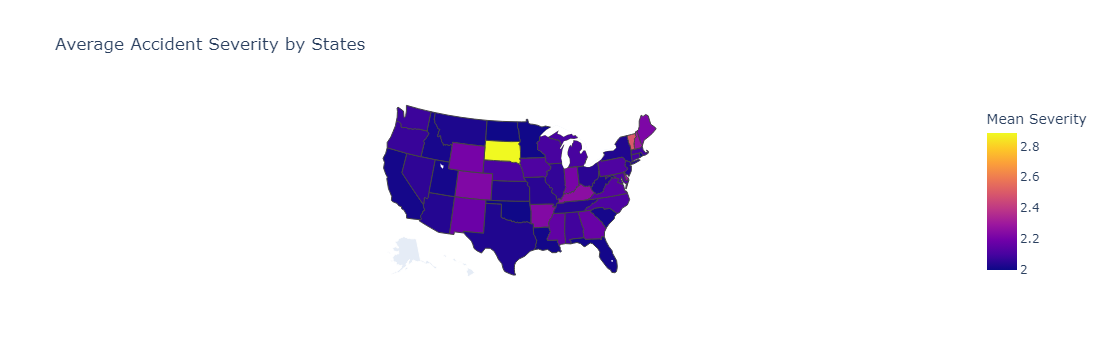

In [25]:
px.choropleth(data1,locations='State',locationmode='USA-states',
             geojson=None,color='Severity',scope='usa',
             labels={'Severity':'Mean Severity'},title='Average Accident Severity by States')


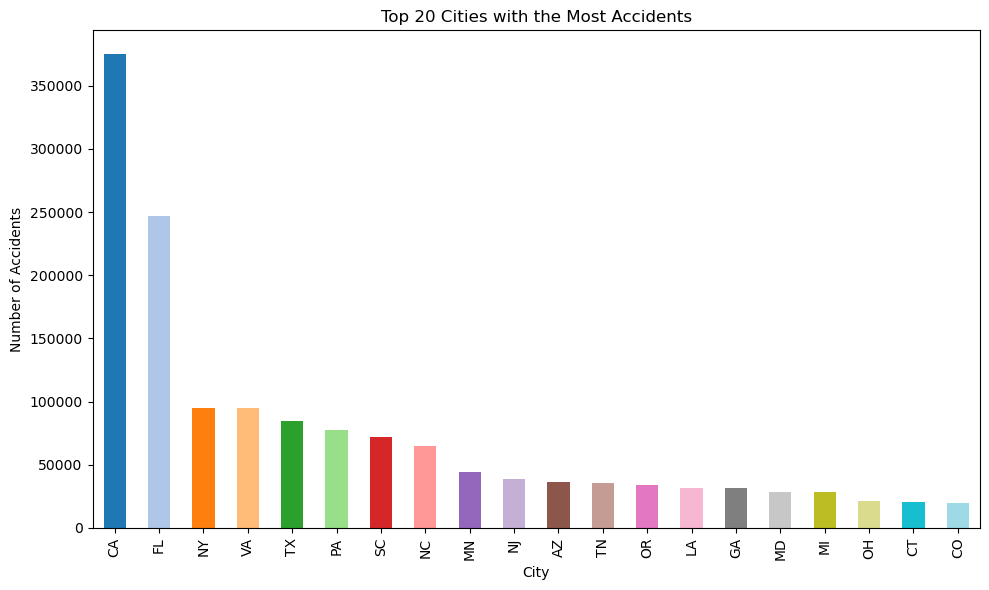

In [27]:
accidents_by_state = data['State'].value_counts()
top_20_states = accidents_by_state.head(20)
plt.figure(figsize=(10, 6))
color_range = range(50)
top_20_states.plot(kind='bar', color=plt.get_cmap('tab20')(range(len(color_range))))
plt.title('Top 20 Cities with the Most Accidents')
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.tight_layout()

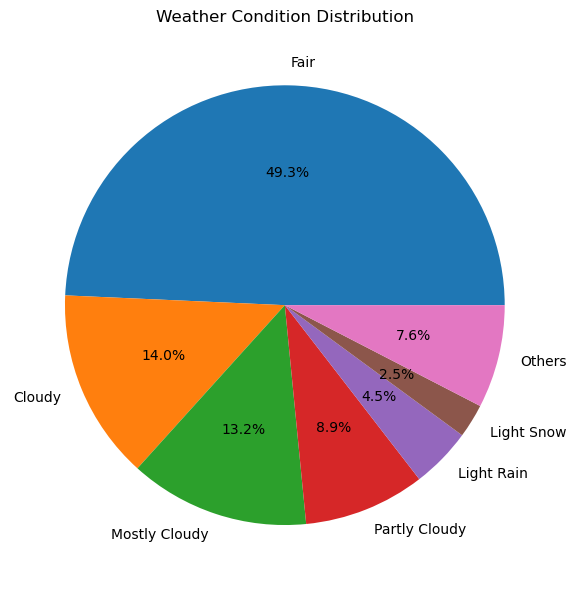

In [29]:
weather_counts = data['Weather_Condition'].value_counts()

# Group the main categories of weather conditions
top_conditions = weather_counts.head(6)
other_conditions_count = weather_counts.iloc[7:].sum()

# Create a new DataFrame with the summarized weather conditions
summary_weather_counts = pd.DataFrame(top_conditions).reset_index()
summary_weather_counts.columns = ['Weather_Condition', 'Count']

others_row = pd.DataFrame({'Weather_Condition': ['Others'], 'Count': [other_conditions_count]})
summary_weather_counts = pd.concat([summary_weather_counts, others_row], ignore_index=True)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(summary_weather_counts['Count'], labels=summary_weather_counts['Weather_Condition'], autopct='%1.1f%%')
plt.title('Weather Condition Distribution')
plt.tight_layout()

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Sunrise_Sunset', ylabel='Count'>

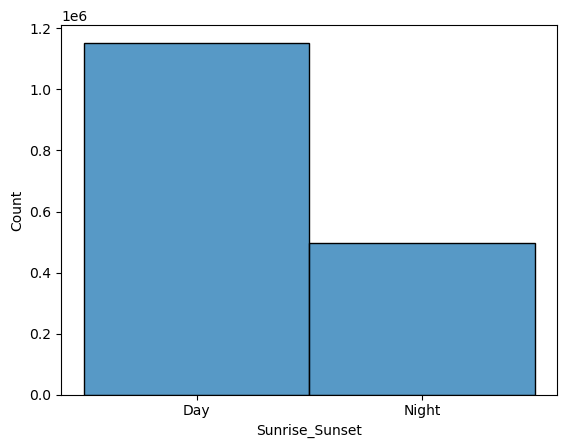

In [31]:
sns.histplot(x='Sunrise_Sunset',data=data)

Text(0.5, 0.98, 'Histogram of Temperature by State')

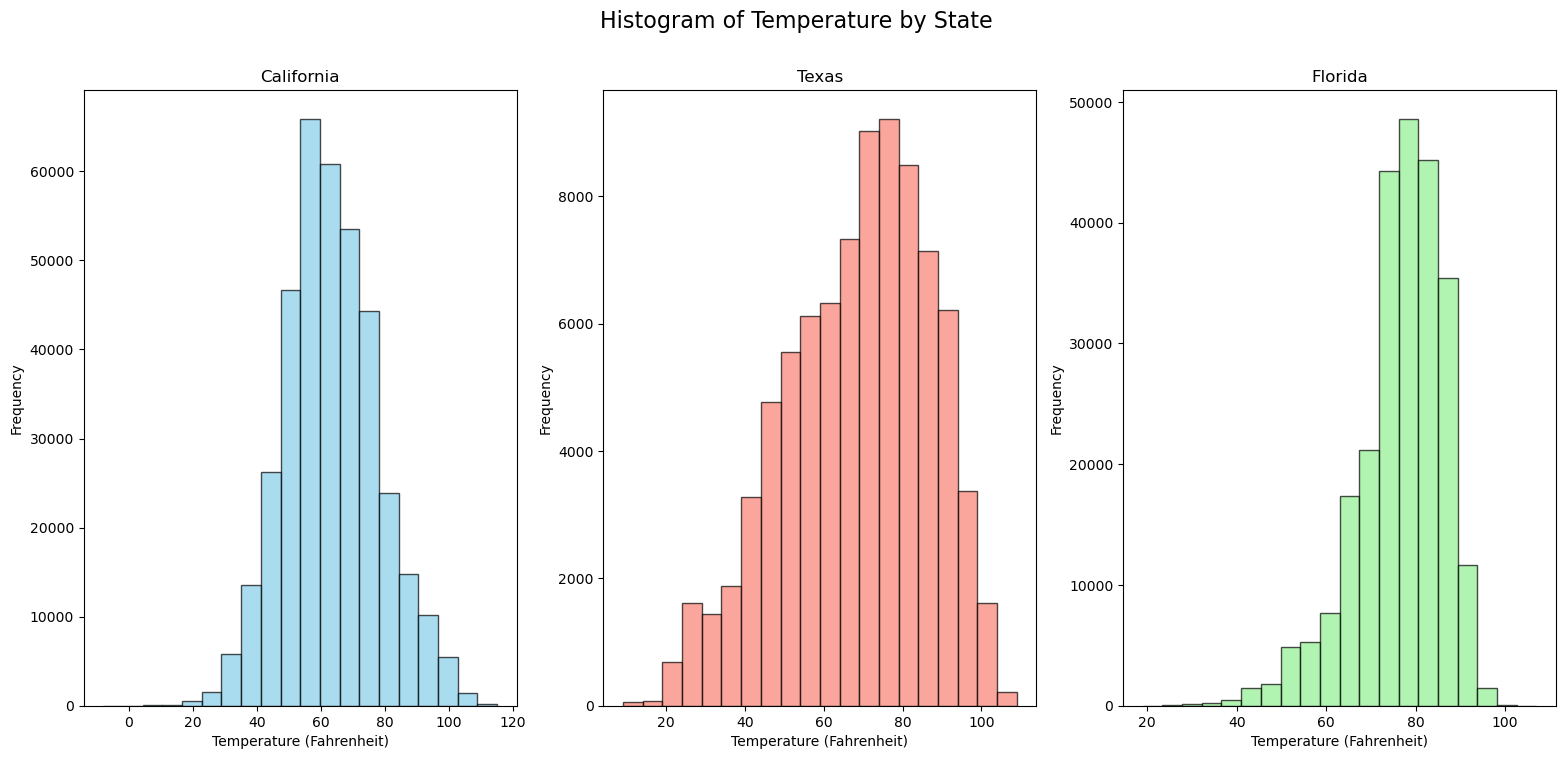

In [36]:
# Filter data for California, Texas, and Florida
california_data = data[data['State'] == 'CA']['Temperature(F)'].dropna()
texas_data = data[data['State'] == 'TX']['Temperature(F)'].dropna()
florida_data = data[data['State'] == 'FL']['Temperature(F)'].dropna()

# Create subplots for each state
fig, axes = plt.subplots(1, 3, figsize=(19, 8))

# California
axes[0].hist(california_data, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('California')
axes[0].set_xlabel('Temperature (Fahrenheit)')
axes[0].set_ylabel('Frequency')

# Texas
axes[1].hist(texas_data, bins=20, color='salmon', edgecolor='black', alpha=0.7)
axes[1].set_title('Texas')
axes[1].set_xlabel('Temperature (Fahrenheit)')
axes[1].set_ylabel('Frequency')

# Florida
axes[2].hist(florida_data, bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[2].set_title('Florida')
axes[2].set_xlabel('Temperature (Fahrenheit)')
axes[2].set_ylabel('Frequency')

plt.suptitle('Histogram of Temperature by State', fontsize=16)

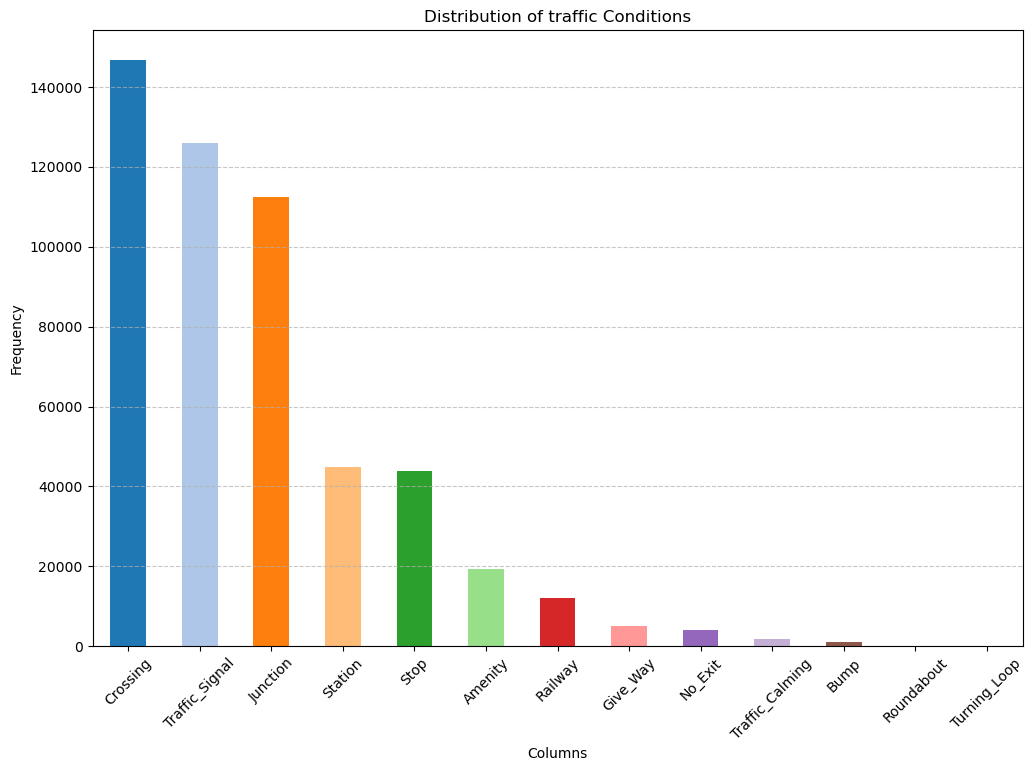

In [38]:
boolean_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 
                   'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

data[boolean_columns] = data[boolean_columns].astype(int)
# Plot histograms for traffic conditions
plt.figure(figsize=(12, 8))
data[boolean_columns].sum().sort_values(ascending=False).plot(kind='bar', color=plt.get_cmap('tab20')(range(len(color_range))))
plt.title('Distribution of traffic Conditions')
plt.xlabel('Columns')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', ls='--', alpha=0.7)

Text(0, 0.5, 'Latitude')

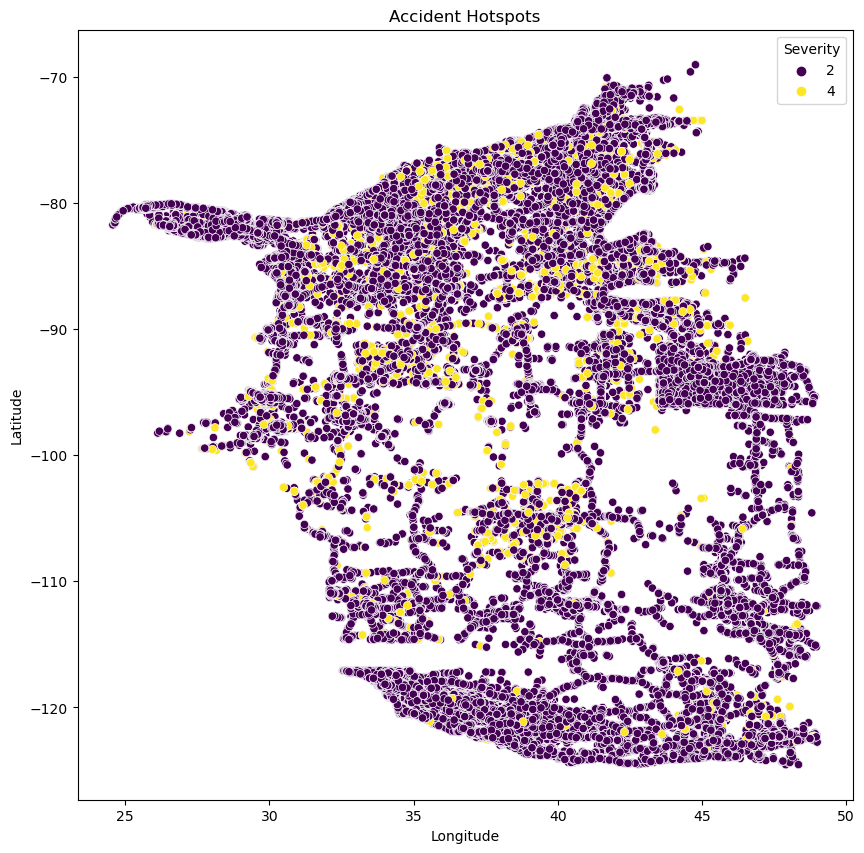

In [50]:
# Geospatial analysis based on Latitude and Longitude
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Start_Lat', y='Start_Lng', hue='Severity', data=data,palette='viridis')
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

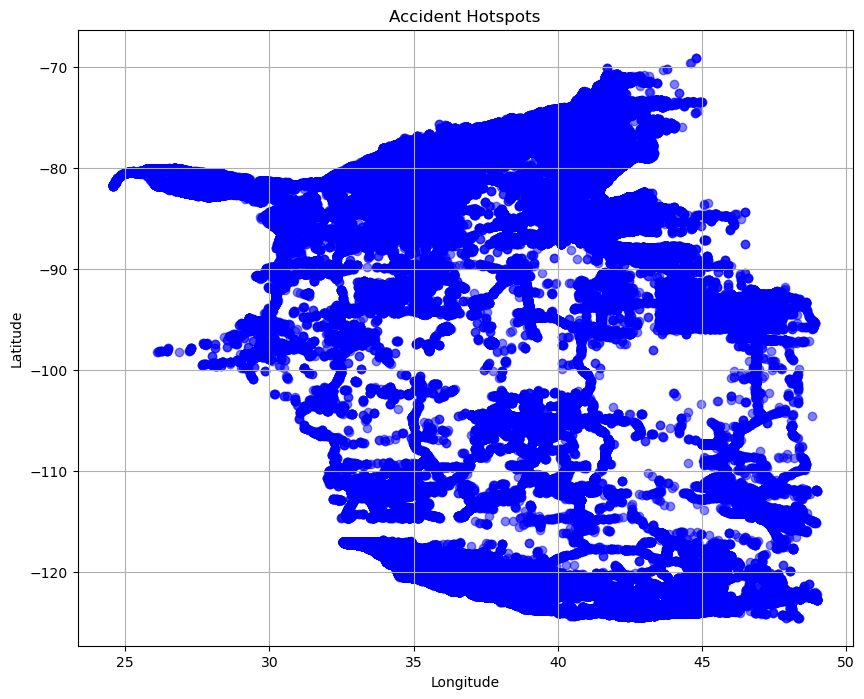

In [51]:
# Plotting accident hotspots using latitude and longitude
plt.figure(figsize=(10, 8))
plt.scatter(data['End_Lat'], data['End_Lng'], alpha=0.5, c='blue')
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)